In [ ]:
%%capture
import requests 
url = 'https://storage.googleapis.com/wandb_datasets/nature_12K.zip'
r = requests.get(url, allow_redirects=True)
open('nature_12K.zip', 'wb').write(r.content)
!wget 'https://storage.googleapis.com/wandb_datasets/nature_12K.zip' #downloading data
!unzip nature_12K.zip

In [ ]:
# import the necessary packages
import pandas as pd
import os
import keras
import tensorflow as tf
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator

def data(image_size,augment_data,batch_size):
      home_path = "/content/inaturalist_12K"  # initialize the path to the *original* input directory of images
      # derive the paths to the training, validation, and testing
      train_path = os.path.join(home_path,'train')
      test_path = os.path.join(home_path,'val')
      if augment_data == True:# initialize the training data augmentation object
        train_data = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,brightness_range=[0.2,1.2],validation_split=0.1) # brightness
        test_data = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,brightness_range=[0.2,1.2]) # brightness

      else:
        train_data = ImageDataGenerator(rescale=1./255, validation_split=0.1)# initialize the training generator
        test_data = ImageDataGenerator(rescale=1./255)# initialize the test generator

      
      train_generator = train_data.flow_from_directory(directory= train_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical",subset = "training")
      val_generator = train_data.flow_from_directory(directory= train_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical",subset = "validation")
      test_generator = test_data.flow_from_directory(directory= test_path,target_size=(image_size, image_size), batch_size=batch_size,color_mode="rgb",class_mode="categorical")
      return train_generator,val_generator,test_generator

def CNN_model(image_size,kernel_size,num_filters,filter_org,dropout,batch_norm,epochs,dense_size,lr):
            if filter_org == "same":
                filters = [num_filters,num_filters,num_filters,num_filters,num_filters]
            if filter_org == "doubling": 
                filters = [num_filters,num_filters*2,num_filters*4,num_filters*8,num_filters*16]
            if filter_org == "halving":
                filters = [num_filters,int(num_filters/2),int(num_filters/4),int(num_filters/8),int(num_filters/16)]
            #initialising sequential model
            nature_model = Sequential()
            #First convolution layer
            nature_model.add(Conv2D(filters[0], kernel_size=(kernel_size, kernel_size),activation='relu',input_shape=(image_size,image_size,3)))
            if batch_norm == True:
                          print("batch_norm")
                          nature_model.add(BatchNormalization()) 
            nature_model.add(MaxPooling2D(2, 2)) #pooling Layer
            #Second convolution layer
            nature_model.add(Conv2D(filters[1], kernel_size=(kernel_size, kernel_size),activation='relu',input_shape=(image_size,image_size,3)))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))  #pooling Layer

            #Third convolution layer
            nature_model.add(Conv2D(filters[2], kernel_size=(kernel_size, kernel_size),activation='relu',input_shape=(image_size,image_size,3)))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))  
            #Fourth convolution layer
            nature_model.add(Conv2D(filters[3], kernel_size=(kernel_size, kernel_size),activation='relu',input_shape=(image_size,image_size,3)))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2)) 
            #Fifth convolution layer
            nature_model.add(Conv2D(filters[4], kernel_size=(kernel_size, kernel_size),activation='relu',input_shape=(image_size,image_size,3)))
            if batch_norm == True:
                          nature_model.add(BatchNormalization())
            nature_model.add(MaxPooling2D(2, 2))             
            nature_model.add(Flatten())
            nature_model.add(Dense(dense_size, activation='relu'))
            nature_model.add(Dropout(dropout))

            
            nature_model.add(Dense(10, activation='softmax'))
            return nature_model



In [ ]:
image_size = 200
kernel_size = 3
num_filters = 64
filter_org = "same"
dropout = 0.3
batch_norm = False
epochs = 10
dense_size = 64
lr = 0.001
augment_data = False
batch_size = 200
train_gen, val_gen, test_gen = data(image_size,augment_data,batch_size) #generating train,test and val data
model = CNN_model(image_size,kernel_size,num_filters, filter_org,dropout, batch_norm,epochs,dense_size,lr)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy") #complie our model
model.fit(train_gen, epochs=epochs, validation_data=test_gen) #Ftiting our model into the train and val data
model.summary()
model.save("my_best_model.h5")

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/10
45/45 [==============================] - 186s 4s/step - loss: 2.2883 - categorical_accuracy: 0.1282 - val_loss: 2.2580 - val_categorical_accuracy: 0.1675
Epoch 2/10
45/45 [==============================] - 161s 4s/step - loss: 2.2108 - categorical_accuracy: 0.1799 - val_loss: 2.1555 - val_categorical_accuracy: 0.2215
Epoch 3/10
45/45 [==============================] - 147s 3s/step - loss: 2.1480 - categorical_accuracy: 0.2159 - val_loss: 2.1118 - val_categorical_accuracy: 0.2415
Epoch 4/10
45/45 [==============================] - 138s 3s/step - loss: 2.0906 - categorical_accuracy: 0.2471 - val_loss: 2.0495 - val_categorical_accuracy: 0.2740
Epoch 5/10
45/45 [==============================] - 136s 3s/step - loss: 2.0277 - categorical_accuracy: 0.2688 - val_loss: 2.0135 - val_categorical_accuracy: 0.2815
Epoch 6/10
45/45 [=============================

In [ ]:
model = keras.models.load_model("my_best_model.h5")

In [ ]:
def guided_backprop(model_path, n_images):

    # loading the data and the model
    train_gen, val_gen, test_gen = data(image_size,augment_data,batch_size) #generating train,test and val data
    model = tf.keras.models.load_model(model_path)

    # take upto 5th convolutional layer
    model_upto_conv5 = tf.keras.models.Model([model.inputs],[model.get_layer("conv2d_4").output])

    # creating a custom gradient to track actual non-zero gradients
    @tf.custom_gradient
    def guidedRelU(x):
        def grad(dy):
            return tf.cast(dy>0, tf.float32) * tf.cast(x>0, tf.float32) * dy
        return tf.nn.relu(x), grad

    for layer in model.layers[1:]:
        if hasattr(layer, 'activation') and layer.activation==tf.keras.activations.relu:
            layer.activation = guidedRelU

    # plotting the images
    fig, axs = plt.subplots(n_images, 2, figsize=(2*4, n_images*4))
    inputs = tf.convert_to_tensor(test_gen[0][0][:n_images], dtype=tf.float32)

    for i in range(n_images):

        with tf.GradientTape() as tape:
            input = tf.expand_dims(inputs[i], 0)
            tape.watch(input)
            output = model_upto_conv5(input)[0]
        
        gradients = tape.gradient(output,input)[0]

        axs[i][0].set_title("Original Image")
        axs[i][0].imshow(inputs[i])
        axs[i][1].set_title("Guided backpropagation")
        axs[i][1].imshow(gradients)

    plt.show()

Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

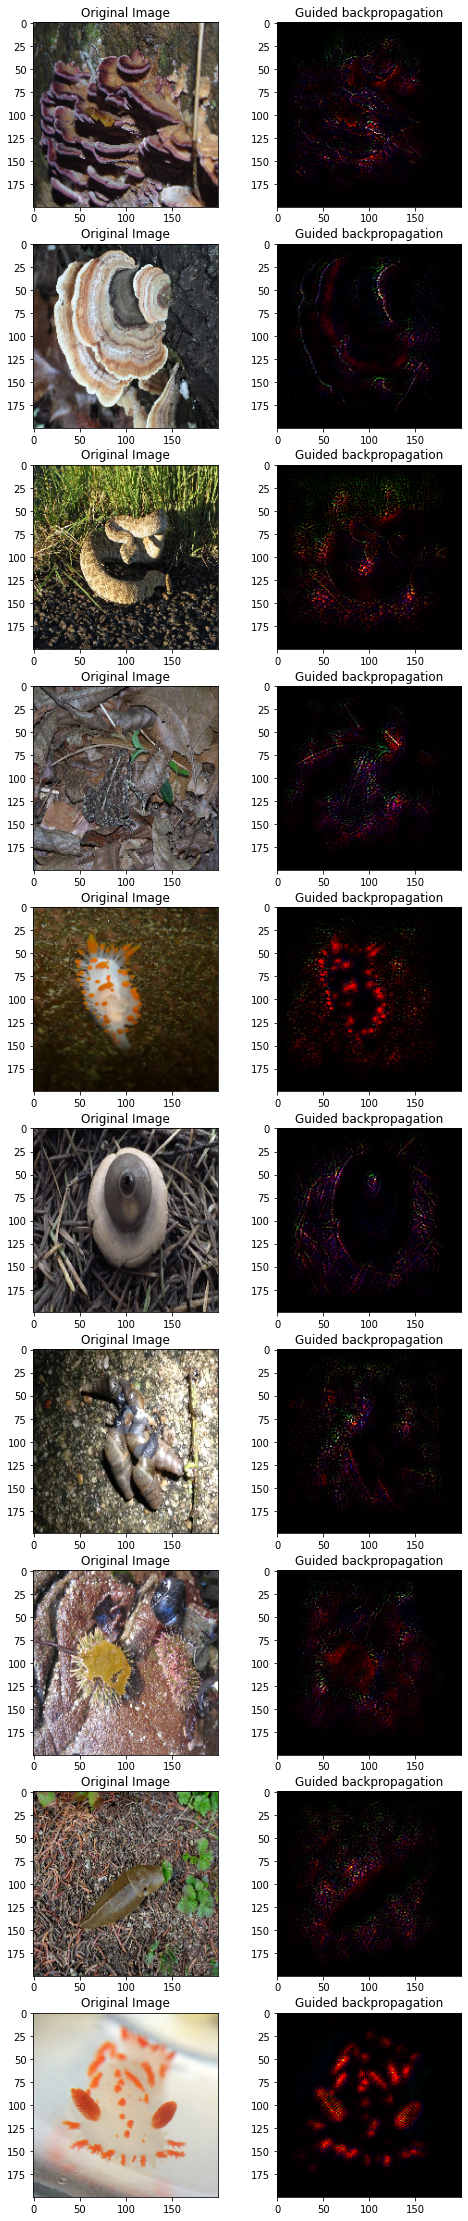

In [ ]:
guided_backprop("my_best_model.h5", 10)